In [47]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
import mrmr

In [2]:
data_dir = 'data'

df = pd.read_csv(os.path.join(data_dir, 'final_data.csv'))


In [3]:
df['tau_ab_ratio'] = df['TAU_bl'] / df['ABETA_bl']
df['ptau_ab_ratio'] = df['PTAU_bl'] / df['ABETA_bl']

Taken from "CSF biomarkers of Alzheimer’s disease concord with amyloid-β PET and predict clinical progression: A study of fully automated immunoassays in BioFINDER and ADNI cohorts"

In [4]:
df['A+'] = df['ABETA_bl'].apply(lambda x: 1 if x < 880 else 0)
df['T+'] = df['ptau_ab_ratio'].apply(lambda x: 1 if x > 0.028 else 0)
df['N+'] = df['tau_ab_ratio'].apply(lambda x: 1 if x > 0.33 else 0)

In [56]:
df['SUVr_Vermis_8.nii'].describe()

count    543.000000
mean       0.012274
std        0.001178
min        0.008156
25%        0.011467
50%        0.012260
75%        0.013009
max        0.015684
Name: SUVr_Vermis_8.nii, dtype: float64

In [16]:
df = df.drop(columns=['PTEDUCAT','TAU_bl','PTAU_bl','ABETA_bl', 'MMSE_bl','EcogPtTotal_bl', 'LDELTOTAL_BL', 'mPACCdigit_bl', 'mPACCtrailsB_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'tau_ab_ratio', 'ptau_ab_ratio'])

df.head()

,SUVr_ACC_pre_L.nii,SUVr_ACC_pre_R.nii,SUVr_ACC_sub_L.nii,SUVr_ACC_sub_R.nii,SUVr_ACC_sup_L.nii,SUVr_ACC_sup_R.nii,SUVr_Amygdala_L.nii,SUVr_Amygdala_R.nii,SUVr_Angular_L.nii,SUVr_Angular_R.nii,...,SUVr_Vermis_6.nii,SUVr_Vermis_7.nii,SUVr_Vermis_8.nii,SUVr_Vermis_9.nii,SUVr_Vermis_10.nii,SUVr_VTA_L.nii,SUVr_VTA_R.nii,A+,T+,N+
0,-1.036305,-0.944252,-0.943637,-0.956548,0.039320,0.038841,0.011054,0.014155,-1.536236,-1.434771,...,0.018253,0.009289,0.011917,0.008881,0.006231,0.000712,0.000659,1,0,0
1,1.193040,1.119475,1.146182,0.929328,0.057261,0.053242,0.013008,0.017184,1.734375,2.031744,...,0.016903,0.009108,0.012666,0.008033,0.006029,0.000770,0.000699,1,1,1
2,1.485349,1.479118,1.520871,1.377067,0.054272,0.053113,0.013620,0.016730,1.583530,1.174492,...,0.019224,0.010413,0.012902,0.007799,0.005730,0.000804,0.000760,1,1,1
3,-0.076402,-0.117696,-0.401966,-0.095506,0.044834,0.042373,0.011938,0.015462,-0.681419,-0.333145,...,0.019834,0.010011,0.012782,0.009789,0.006613,0.000748,0.000675,1,0,0
4,-0.176979,-0.460626,-0.096761,-0.212546,0.042674,0.039067,0.011457,0.013684,-0.176115,-0.568854,...,0.017897,0.009361,0.012595,0.008533,0.005170,0.000675,0.000675,1,1,1


# SVM Model

In [60]:
X = df.drop(columns=['A+', 'T+', 'N+'])
y = df['N+']  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=df.drop(columns=['A+', 'T+', 'N+']).columns)  

features = mrmr.mrmr_classif(X, y, K=25)

100%|██████████| 25/25 [00:00<00:00, 50.19it/s]


In [61]:
features[:25]

['SUVr_Precuneus_L.nii',
 'SUVr_Fusiform_L.nii',
 'SUVr_Precuneus_R.nii',
 'SUVr_Temporal_Mid_L.nii',
 'SUVr_ACC_pre_L.nii',
 'SUVr_Angular_L.nii',
 'SUVr_ACC_sub_L.nii',
 'SUVr_Temporal_Inf_L.nii',
 'SUVr_Fusiform_R.nii',
 'SUVr_Temporal_Mid_R.nii',
 'SUVr_Parietal_Sup_L.nii',
 'SUVr_Frontal_Med_Orb_L.nii',
 'SUVr_ACC_sub_R.nii',
 'SUVr_Parietal_Inf_L.nii',
 'SUVr_Temporal_Sup_R.nii',
 'SUVr_Olfactory_L.nii',
 'SUVr_Rectus_L.nii',
 'SUVr_Occipital_Mid_L.nii',
 'SUVr_Frontal_Med_Orb_R.nii',
 'SUVr_Angular_R.nii',
 'SUVr_Rectus_R.nii',
 'SUVr_Temporal_Sup_L.nii',
 'SUVr_ACC_pre_R.nii',
 'SUVr_Occipital_Inf_L.nii',
 'SUVr_Insula_R.nii']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state =40)

In [63]:
clf = SVC(kernel='sigmoid', C = 1, gamma = 0.001) 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [68]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))
print("MCC: ", matthews_corrcoef(y_test, y_pred))


Accuracy: 0.908256880733945
Precision: 0.96
Recall: 0.8571428571428571
F1 Score:  0.9081873315363882
MCC:  0.8219030920784135


In [69]:
confusion_matrix(y_test, y_pred)

array([[51,  2],
       [ 8, 48]])

In [70]:
y_scores = clf.decision_function(X_test)

roc_auc_score(y_test, y_scores)

0.9669811320754716

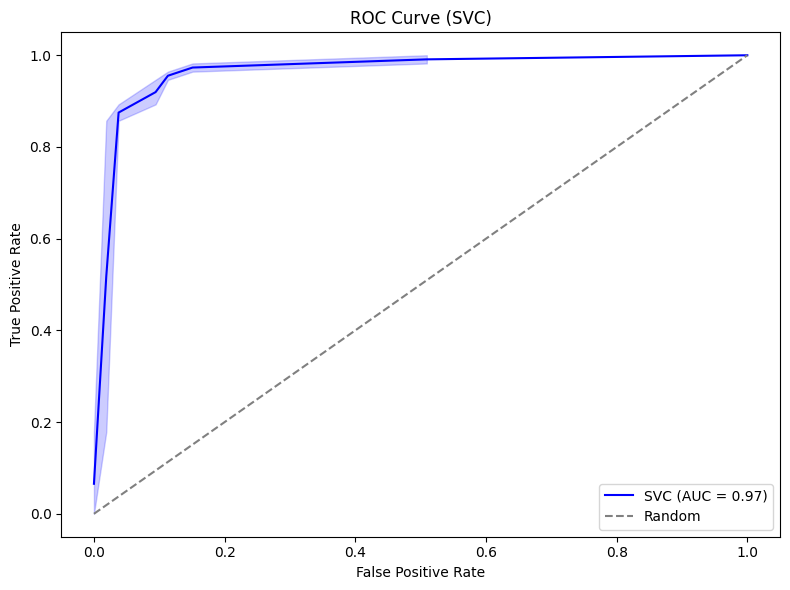

In [67]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f"SVC (AUC = {roc_auc:.2f})", color='blue')
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# MultiOutput

In [272]:
y = df.filter(['A+', 'T+', 'N+'])


X = df.drop(columns=['A+', 'T+', 'N+'])
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.drop(columns=['A+', 'T+', 'N+']).columns) 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state =7)

clf = MultiOutputClassifier(SVC(C=1, gamma='scale', kernel='rbf'))

clf.fit(X_train, y_train)

,estimator,SVC(C=1)
,n_jobs,None
,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200


In [273]:
y_pred = clf.predict(X_test)



In [274]:
for i, col in enumerate(y.columns):

    
    print(f"{col} accuracy: ",accuracy_score(y_pred[:,i], y_test[col]))

A+ accuracy:  0.8256880733944955
T+ accuracy:  0.926605504587156
N+ accuracy:  0.9357798165137615


# Optimisation

In [ ]:
X = df.drop(columns=['A+', 'T+', 'N+'])
y = df['A+']  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=df.drop(columns=['A+', 'T+', 'N+']).columns)  

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state =40)

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

clf = SVC(probability=True)

grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-10)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV accuracy):", grid_search.best_score_)

y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...................C=0.01, gamma=scal

# PCA 

In [ ]:
X = df.drop(columns=['A+', 'T+', 'N+'])
y = df['N+'] 

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=df.drop(columns=['A+', 'T+', 'N+']).columns)  # Preserve column names




X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state =40)

pca = PCA(n_components=2)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)



In [ ]:
clf = SVC(kernel='sigmoid', C = 1, gamma = 0.001) 

clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

In [14]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))


Accuracy: 0.8899082568807339
Precision: 0.9230769230769231
Recall: 0.8571428571428571


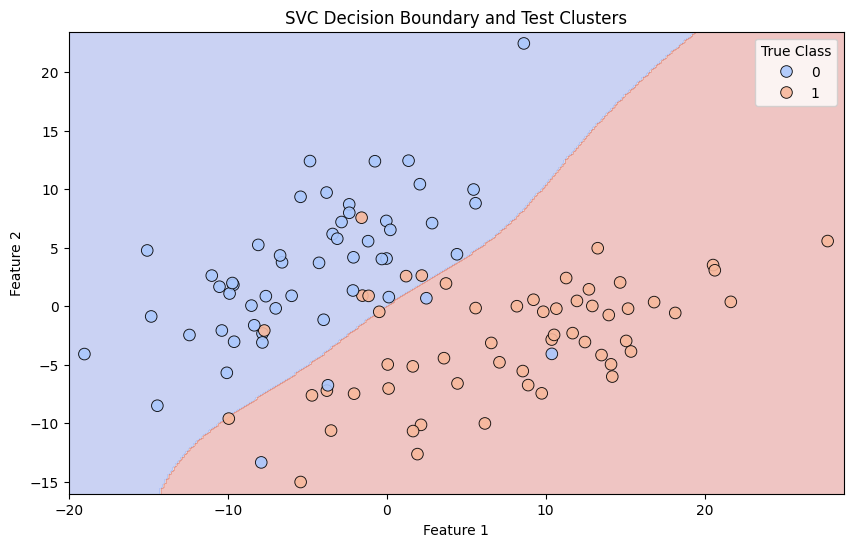

Accuracy: 0.908256880733945
Precision: 0.9259259259259259
Recall: 0.8928571428571429


In [ ]:
X_train_np = X_train_pca.values if hasattr(X_train_pca, "values") else X_train_pca
X_test_np = X_test_pca.values if hasattr(X_test_pca, "values") else X_test_pca

clf = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
clf.fit(X_train_np, y_train)

y_pred = clf.predict(X_test_np)

plt.figure(figsize=(10, 6))
x_min, x_max = X_test_np[:, 0].min() - 1, X_test_np[:, 0].max() + 1
y_min, y_max = X_test_np[:, 1].min() - 1, X_test_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_test_np[:, 0], y=X_test_np[:, 1], hue=y_test,
                palette='coolwarm', edgecolor='k', s=70, alpha=0.9)

plt.title("SVC Decision Boundary and Test Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='True Class')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


In [ ]:
import torch


In [ ]:
class SVM(torch.nn.Module):
    def __init__(self, features, kernels):
        super().__init__()
        self.features
        self.w = torch.nn.Parameter(np.random.randint())
        self.b = torch.nn.Parameter
        
    def forward(self, x):
        plane_output = x.matmul(self.w) + self.b
        return plane_output